#        Procesamiento de Señales - Trabajo Practico N°2


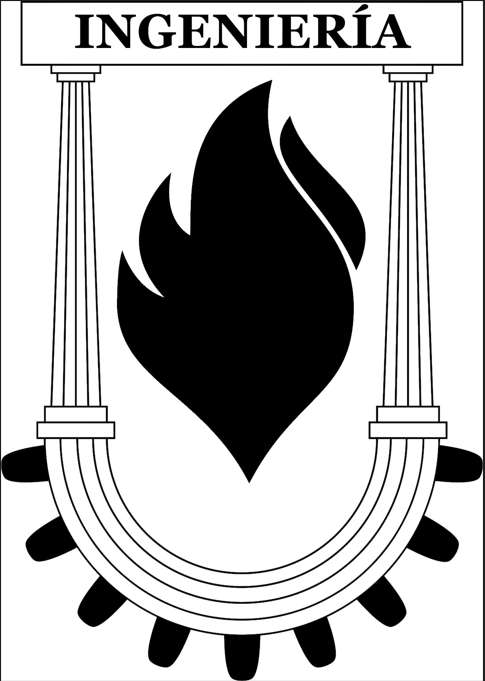

In [1]:
import numpy as np
import scipy.signal as sps
import matplotlib.pyplot as plt
import scipy.fftpack as fft
import matplotlib
import IPython

### Ej: 1: Señal de electroencefalograma:

La señal que se encuentra en el archivo necg.txt corresponde al registro de la actividad eléctrica del corazón de un paciente. Esta señal se ha digitalizado a razón de 360 muestras por segundo. Se sabe que el registro ha sido contaminado con un ruido en la banda de 40 a 180 Hz y se necesita eliminarlo para poder realizar un diagnóstico adecuado. Utilice la TDF para filtrar la señal (genere una mascara para eliminar las frecuencias que se quieren eliminar).

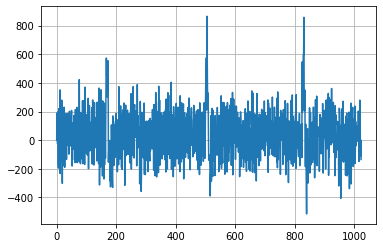

In [2]:
data=np.loadtxt("necg.txt")
plt.plot(data)
plt.grid()

Nº muestras: 1024
Vector tiempo: [0.00000000e+00 2.78049310e-03 5.56098621e-03 ... 2.83888346e+00
 2.84166395e+00 2.84444444e+00]


Text(0, 0.5, 'Amplitud')

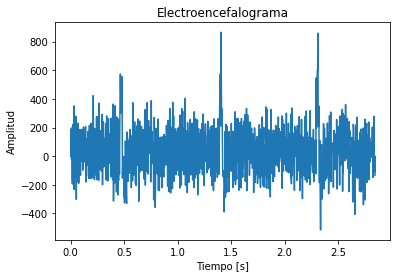

In [3]:
Fs=360
T_muestras=len(data) #longitud, del siguiente print resulta 1024 datos
print ("Nº muestras:",T_muestras)
t0=0
tf=T_muestras/Fs
t=np.linspace(0,tf,T_muestras) 
print ("Vector tiempo:", t) #Tiempo contenido en la señal

plt.plot(t,data)
plt.title("Electroencefalograma")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")

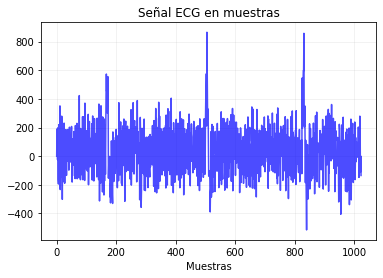

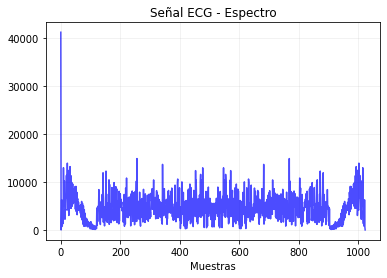

In [4]:
 #Obtenemos los datos de la señal ECG
x=np.loadtxt("necg.txt")
plt.plot(x, color = 'blue', alpha = 0.7)
plt.title("Señal ECG en muestras")
plt.grid(alpha = 0.2)
plt.xlabel("Muestras")
plt.show()

#Definimos la frecuencia de muestreo, que se indica de 360 Hz.

fs = 360

#Definimos la frecuencia mínima y máxima del ruido. 

frmin = 40
frmax = 180
cant_muestras = len(x)

TDF_ecg = np.fft.fft(x) #Debido a que obtenemos valores imaginarios, obtenemos los valores absolutos. 
TDF_ecg_abs = np.abs(TDF_ecg)

#Gráfico de frecuencias respecto a las muestras
plt.plot(TDF_ecg_abs, color ='blue', alpha = 0.7)
plt.title("Señal ECG - Espectro")
plt.grid(alpha = 0.2)
plt.xlabel("Muestras")
plt.show()

Se debe escalar de manera temporal

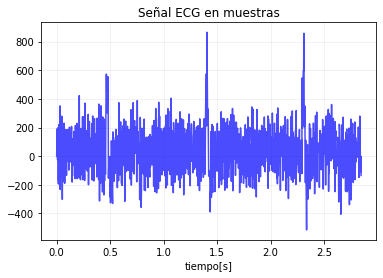

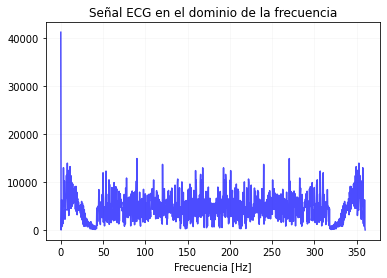

In [5]:
t=np.linspace(0,len(x)/fs,len(x))
plt.plot(t,x, color = 'blue', alpha = 0.7)
plt.title("Señal ECG en muestras")
plt.grid(alpha = 0.2)
plt.xlabel("tiempo[s]")
plt.show()
#Gráfico de frecuencias respecto a la frecuencia

espectro_frec = np.linspace(0,360,len(TDF_ecg_abs))

plt.plot(espectro_frec,TDF_ecg_abs,  color = 'blue', alpha = 0.7)
plt.title("Señal ECG en el dominio de la frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.grid(alpha = 0.1)
plt.show()

Si se tuviera una magnitud significativa tambien deberia hacerse esa transformacion en el eje Y

Muestra de 40Hz es: 113


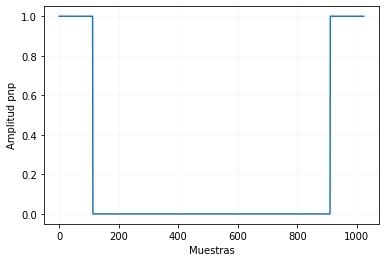

In [6]:
muestra_de_corte = round(cant_muestras*frmin/Fs+0.5)-1
#Nºmuestras*frecuencia_de_corte/fs o lo que es lo mismo normalizamos la frecuencia.
print("Muestra de 40Hz es:",muestra_de_corte)


filtro=np.ones(cant_muestras)
filtro[muestra_de_corte:(cant_muestras-muestra_de_corte)]=0
plt.plot(filtro)
plt.xlabel('Muestras')
plt.ylabel('Amplitud pnp')
plt.grid(alpha = 0.1)
plt.show()

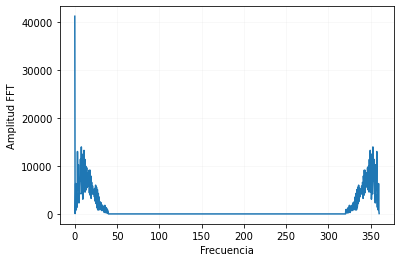

In [7]:
#Multiplico mi filtro (ya que, es en la frecuencia) para solo dejar pasar la frecuencia menor a 40 Hz y su par complementario de 320 en adelante.
TDF_signal_filtered=filtro*TDF_ecg
plt.plot(espectro_frec,abs(TDF_signal_filtered))
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud FFT')
plt.grid(alpha = 0.1)
plt.show()

Otra forma mas sencilla y rapida hubiera sido

In [8]:
#TDF_ecg[muestra_de_corte:(cant_muestras-muestra_de_corte)]=0 #hubiera modificado nuestra señal inicial
#TDF_signal_filtered=TDF_ecg

c:\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


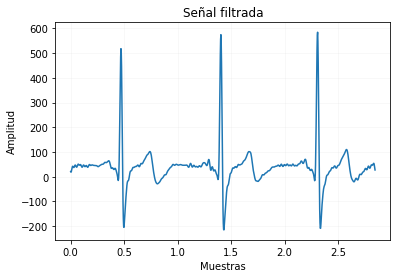

In [9]:
#Con la señal filtrada con con pasa bajo a 40 Hz aplico la antitransformada de fourier.
signal_filtered=np.fft.ifft(TDF_signal_filtered)
plt.plot(t,signal_filtered)
plt.title("Señal filtrada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(alpha = 0.1)
plt.show()
#el error de complejo viene por eliminar no solo en la frecuencia sino en la fase y se genera este inconveniente.

## Filtro real
<p style="text-align: center;"><span style="color: #ff6600;"><strong>Nótese que no genera el error de complejo, pero si el desfase según la cantidad de muestras que toma</strong></span></p>

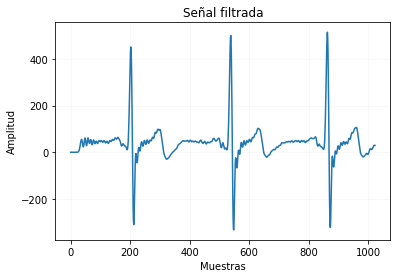

In [11]:
sos = sps.butter(36, 40, 'lp', fs=360, output='sos')
signal_filtered=sps.sosfilt(sos, x)
plt.plot(signal_filtered)
plt.title("Señal filtrada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid(alpha = 0.1)
plt.show()

# Comparación entre señal original y filtrada

c:\python39\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


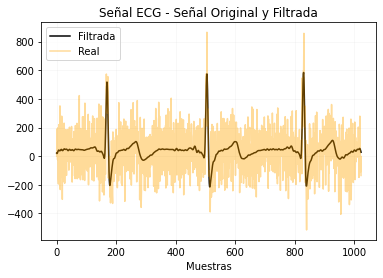

In [10]:
#Comparación entre señal original y filtrada
#señal original
plt.plot(signal_filtered,color = 'black',label="Filtrada")
plt.title("Señal ECG - Señal Original y Filtrada")
plt.plot(x,color = 'orange',alpha = 0.4,label="Real")
plt.grid(alpha = 0.1)
plt.xlabel("Muestras")
plt.legend()
plt.show()